In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

**Create a 2 dimensional dataset of random numbers**

In [12]:
np.random.seed(42)
mean = [0 , 0]
cov = [[3 , 2] , [2 , 2]]
X = np.random.multivariate_normal(cov = cov , mean=mean , size=200)


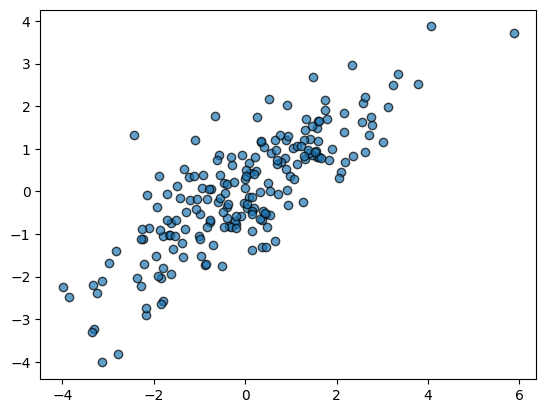

In [13]:
plt.figure()
plt.scatter(X[: , 0] , X[: , 1] , edgecolors='k' , alpha=0.7)
plt.show()

**Initialize 2 component PCA model**

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

The principal components are the principal axes, represented in feature space coordinates, which align with the directions of maximum variance in your data.

In [15]:
components = pca.components_
print(components)

[[ 0.78215821  0.62307987]
 [-0.62307987  0.78215821]]


The principal components are sorted in decreasing order by their explained variance, which can be expressed as a ratio:

In [17]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

Project the data onto its principal component axes
The projection of the data onto a given principal component yields the coordinates of each of the data points along that component's direction.

The new coordinates are given by the dot products of each point's coordinates with the given PCA component.

Specifically, the projections are given by:

In [18]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [19]:
x_pc1 = projection_pc1 * components[0][0]
y_pc1 = projection_pc1 * components[0][1]
x_pc2 = projection_pc2 * components[1][0]
y_pc2 = projection_pc2 * components[1][1]

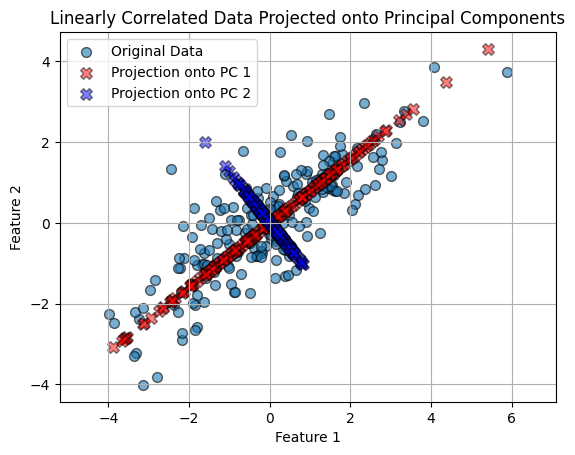

In [20]:
# Plot original data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', s=50, alpha=0.6)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s=70, alpha=0.5, label='Projection onto PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

===================================================================================================================

**IRIS DATASET**

In [22]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


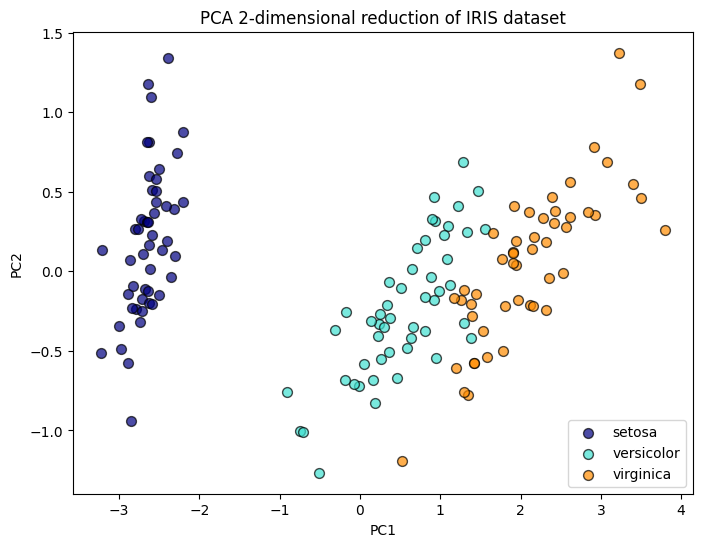

In [25]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8,6))

colors = ['navy', 'turquoise', 'darkorange']
lw = 1

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

In [26]:
100*pca.explained_variance_ratio_.sum()

97.76852063187962

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

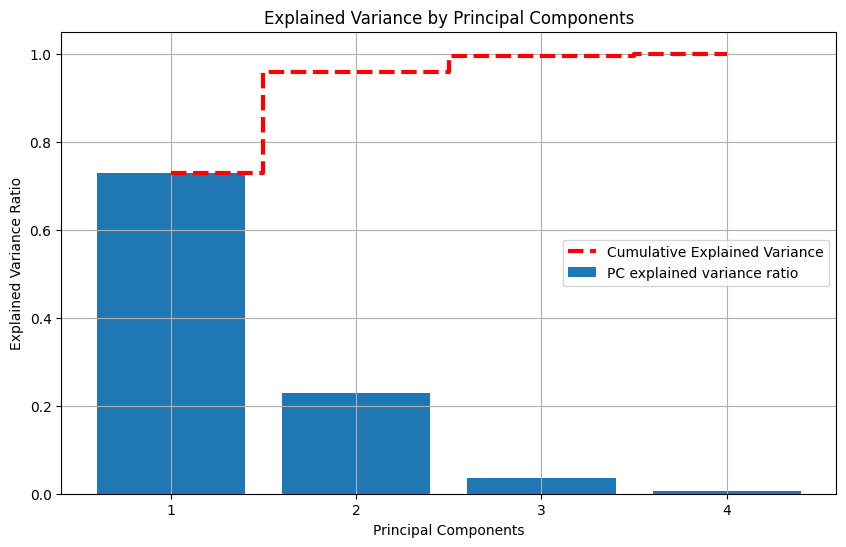

In [28]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio for each component
plt.figure(figsize=(10,6))
plt.bar(x=range(1, len(explained_variance_ratio)+1), height=explained_variance_ratio, alpha=1, align='center', label='PC explained variance ratio' )
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.step(range(1, 5), cumulative_variance, where='mid', linestyle='--', lw=3,color='red', label='Cumulative Explained Variance')
# Only display integer ticks on the x-axis
plt.xticks(range(1, 5))
plt.legend()
plt.grid(True)
plt.show()